Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
insurance = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(insurance)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
display(insurance['Пол'].value_counts())

0    2505
1    2495
Name: Пол, dtype: int64

In [6]:
display(insurance['Члены семьи'].value_counts())

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

Text(0.5, 1.0, 'гистограмма количества членов семьи')

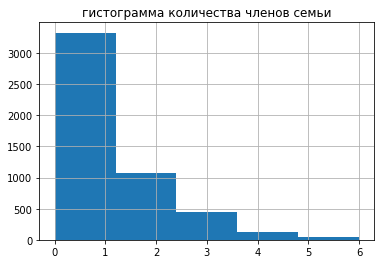

In [7]:
insurance['Члены семьи'].hist(bins=5)
plt.title('гистограмма количества членов семьи')

Text(0.5, 1.0, 'гистограмма значений "Возраст"')

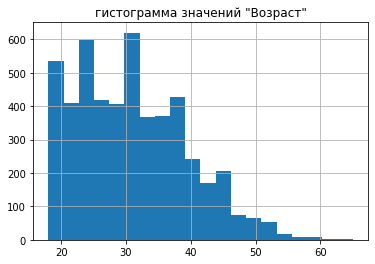

In [8]:
insurance['Возраст'].hist(bins=20)
plt.title('гистограмма значений "Возраст"')

Text(0.5, 1.0, 'гистограмма значений "Зарплата"')

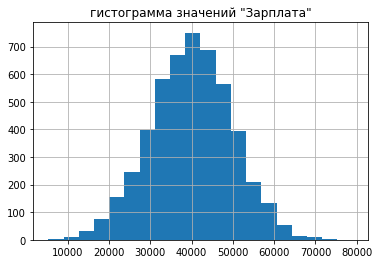

In [9]:
insurance['Зарплата'].hist(bins=20)
plt.title('гистограмма значений "Зарплата"')

In [10]:
display(insurance['Страховые выплаты'].value_counts())

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

Пропусков данных нет. Распределение значений количественных показателей изучено.

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Предсказания $a$ не изменятся

**Обоснование:** 

Используя ассоциативность умножения матриц и используя домножение на обратную матрицу, а также свойство: $AA^{-1}=A^{-1}A=E$

получим ответ: $a_{new} = a$




## 3. Алгоритм преобразования

**Алгоритм**
>
Домножим матрицу X на обратимую матрицу P.
>
Раскроем транспонирование по правилу: $(AB)^T = B^T A^T$
>
Раскроем скобки по правилу: $(AB)^{-1} = B^{-1} A^{-1}$
>
Используем свойство: $AA^{-1}=A^{-1}A=E$

**Обоснование**

$$
a_{new} = XPw_{new}
$$$$
w_{new} = ((XP)^T XP)^{-1}(XP)^T y
$$
подставим $w_{new}$ в $a_{new}$ и преобразуем:

$$
a_{new} = X P ((XP)^T XP)^{-1}(XP)^T y = \\X P (P^TX^T XP)^{-1}P^T X^T y = \\X P (X^TXP)^{-1} (P^T)^{-1} P^T X^T y = \\X P P^{-1}(X^TX)^{-1} (P^T)^{-1} P^T X^T y = \\X E (X^TX)^{-1} E  X^T y = \\X (X^TX)^{-1} X^T y =  X w
$$


Таким образом получаем что:

$$
a_{new} = a
$$



## 4. Проверка алгоритма

In [13]:
X = insurance.drop(columns='Страховые выплаты') #Признаки
y = insurance['Страховые выплаты'] #Целевой признак

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4221)


In [15]:
P=np.random.normal(size=(X.shape[1], X.shape[1])) #Рандомная обратимая матрица
Z = X.dot(P)

In [16]:
P.dot(np.linalg.inv(P))

array([[ 1.00000000e+00, -5.27020452e-17,  1.04559967e-17,
         3.94303322e-17],
       [-2.27879155e-16,  1.00000000e+00,  2.33840036e-17,
        -7.08889265e-17],
       [-1.36614484e-16,  7.41674826e-18,  1.00000000e+00,
         2.67940611e-16],
       [-1.29205229e-16, -1.08129892e-16, -3.39839339e-17,
         1.00000000e+00]])

In [65]:
class LinearRegression_2:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        #X_dim = X.shape[1]
        #P=np.random.normal(size=(X.shape[1], X.shape[1]))
        #Z = X.dot(P)
        #self.P = P
        #self.Z = Z
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        

    def predict(self, test_features):
        #r = np.random.normal(size=(1250, 1250))
        #R = test_features.dot(P)
        return test_features.dot(self.w) + self.w0
    


In [59]:
#Модель по не зашифрованным данным
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)
print(r2_score(y_test, predictions))

0.4348091802699877


In [66]:
Z_train, Z_test, y_train_2, y_test_2 = train_test_split(Z, y, test_size=0.25, random_state=4221)

In [67]:
#Модель по зашифрованным данным
model_2 = LinearRegression_2()
model_2.fit(Z_train, y_train_2)
predictions = model_2.predict(Z_test)
print(r2_score(y_test_2, predictions))

0.43480667540902784


Значения метрик практически не изменились (до 6го знака после запятой). 